## Testing Priors
### What is the distribution of priors?

### Current priors in AJ model1
defined in `macsswig_simsaj/simulation/def_params_M1_inst.py`

In [14]:
import math
import random
from random import randint
import numpy as np
import pandas as pd
from ggplot import *
import functools

In [7]:
'''
Return a list of variables
'''
parameter_vals = []
def rand_value():

    NAF = float(round(10 ** random.uniform(3.7, 5.0)))
    NANC = float(round((10 ** random.uniform(-1.0, 0.0)) * NAF))
    NCEU = float(round(10 ** random.uniform(3.0, 5.0)))
    NCHB = float(round(10 ** random.uniform(3.0, 5.0)))
    NA = float(round(10 ** random.uniform(4.0, 6.7)))
    NAg = float(round(10 ** random.uniform(2.0, math.log10(NA))))
    NJ = float(round(10 ** random.uniform(3.0, 6.0)))
    NM = float(round(10 ** random.uniform(3.0, 6.0)))

    m = random.uniform(0.0,1.0)

    Tgrowth_Af = float(randint(1, 4100))
    Taf = float(randint(1600, 4100))
    TEM = float(randint(400, 1200))
    Teu_as = float(randint(int(TEM) + 1, int(Taf) - 1))
    TA = float(randint(20, 36))
    TMJ = float(randint(int(TA) + 1, int(TEM) - 1))
    Tm = float(randint(16, int(TA) - 1))
    TAg = float(randint(1, int(TA) - 1))

    parameter_vals = [NAF,NANC,NCEU,NCHB,NA,NAg,NJ,NM,m,Tgrowth_Af,Taf,TEM,Teu_as,TA,TMJ,Tm,TAg]
    return parameter_vals

In [3]:
## parameters is a list
random_numbers = (rand_value() for _ in range(10000))
parameters_names = ['NAF','NANC','NCEU','NCHB','NA','NAg','NJ','NM','m','Tgrowth_Af','Taf','TEM','Teu_as','TA','TMJ','Tm','TAg']
parameter_table = []
for r in random_numbers:
    parameter_table.append(r)
parameters_df = pd.DataFrame(parameter_table)
parameters_df.columns = parameters_names
parameters_df.head()

,NAF,NANC,NCEU,NCHB,NA,NAg,NJ,NM,m,Tgrowth_Af,Taf,TEM,Teu_as,TA,TMJ,Tm,TAg
0,16092.0,6574.0,36518.0,2337.0,247985.0,17785.0,1109.0,86025.0,0.936606,3881.0,1940.0,1172.0,1612.0,23.0,957.0,17.0,21.0
1,22613.0,7426.0,54567.0,11306.0,4020648.0,2229666.0,7489.0,11188.0,0.296813,910.0,2619.0,582.0,1890.0,22.0,230.0,20.0,15.0
2,33783.0,3697.0,1872.0,2681.0,115468.0,4752.0,51280.0,83267.0,0.470128,1430.0,3641.0,438.0,1697.0,25.0,235.0,21.0,20.0
3,14021.0,2568.0,17773.0,6223.0,53320.0,1676.0,214683.0,295998.0,0.252140,2688.0,1965.0,937.0,1759.0,28.0,436.0,19.0,2.0
4,10889.0,1595.0,16020.0,3756.0,35059.0,9981.0,8709.0,3332.0,0.181437,3798.0,3206.0,853.0,2480.0,20.0,477.0,19.0,12.0


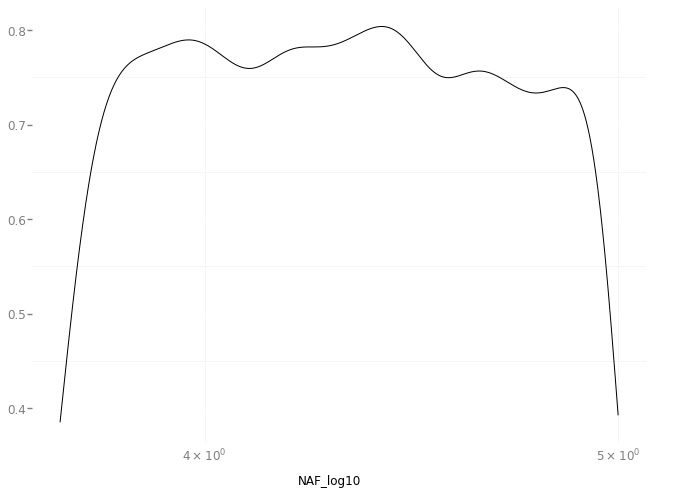

<ggplot: (276212081)>


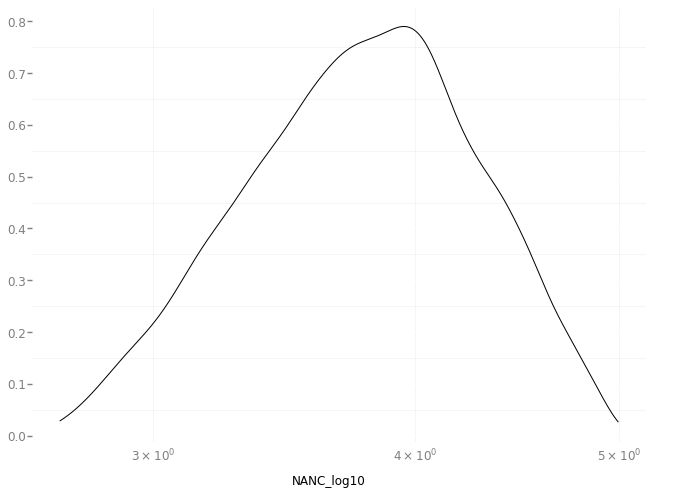

<ggplot: (281925849)>


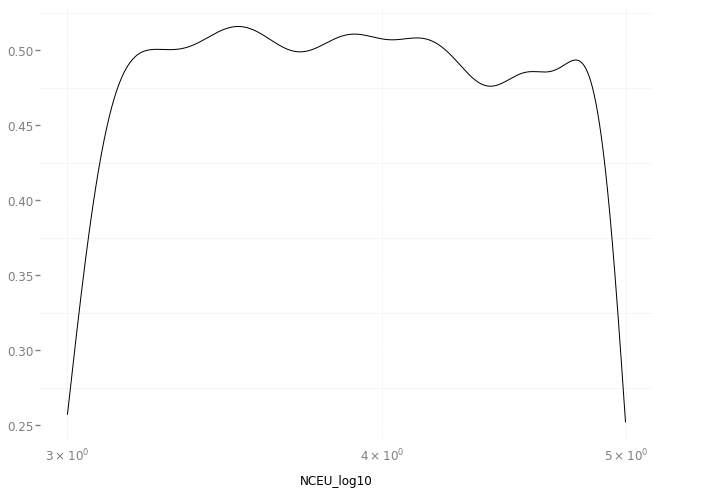

<ggplot: (282646365)>


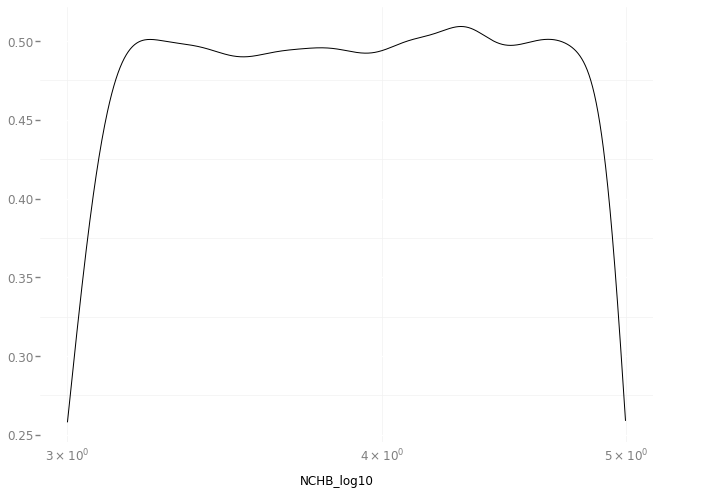

<ggplot: (282657293)>


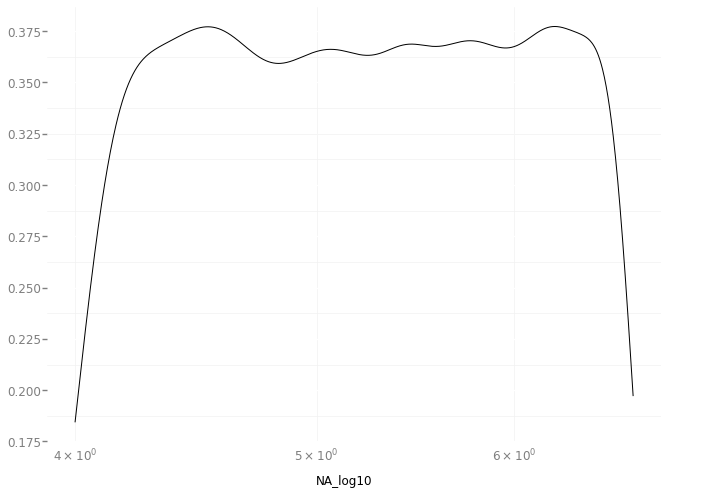

<ggplot: (282646369)>


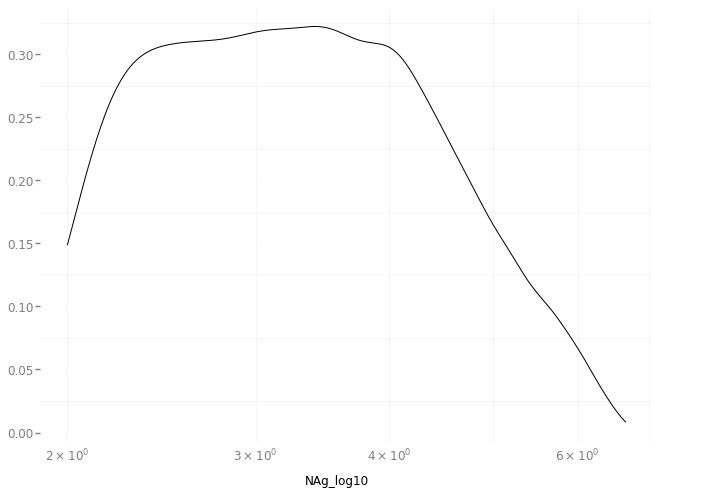

<ggplot: (283988609)>


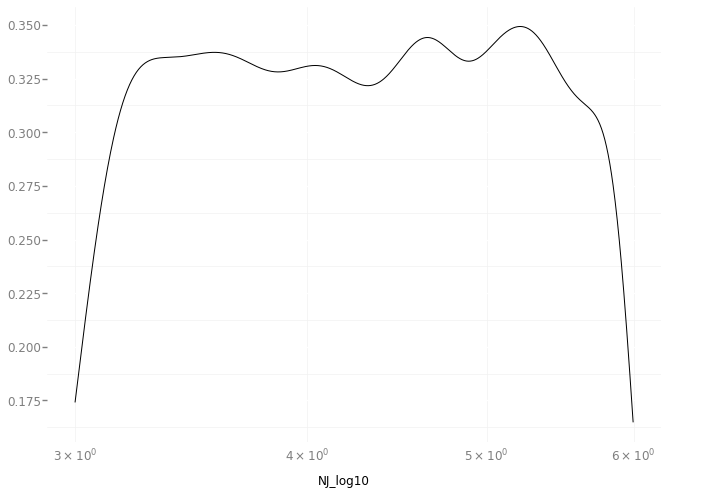

<ggplot: (284094785)>


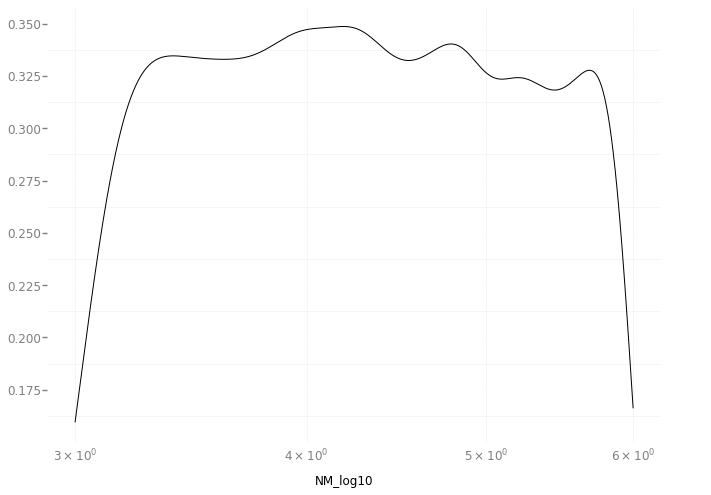

<ggplot: (284123217)>


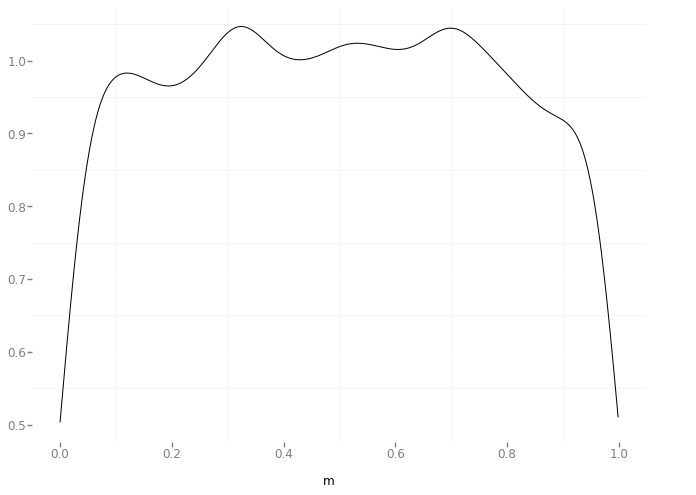

<ggplot: (285976685)>


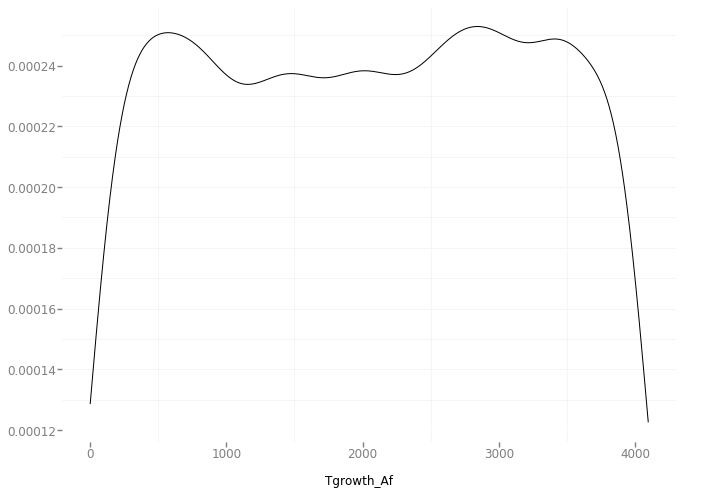

<ggplot: (282121733)>


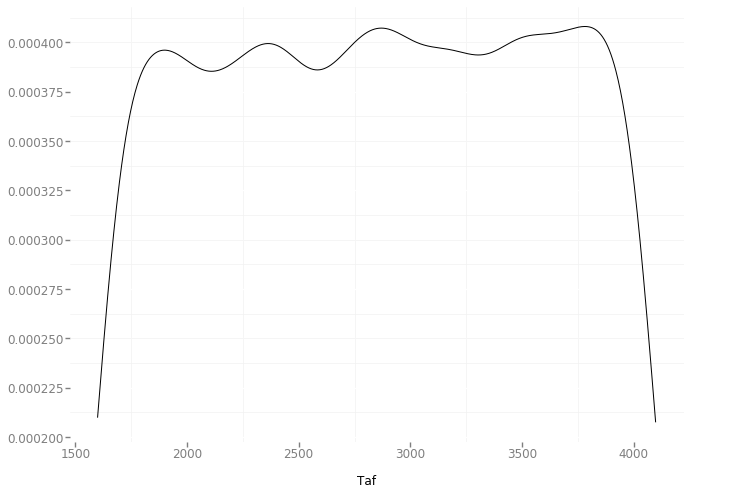

<ggplot: (282001797)>


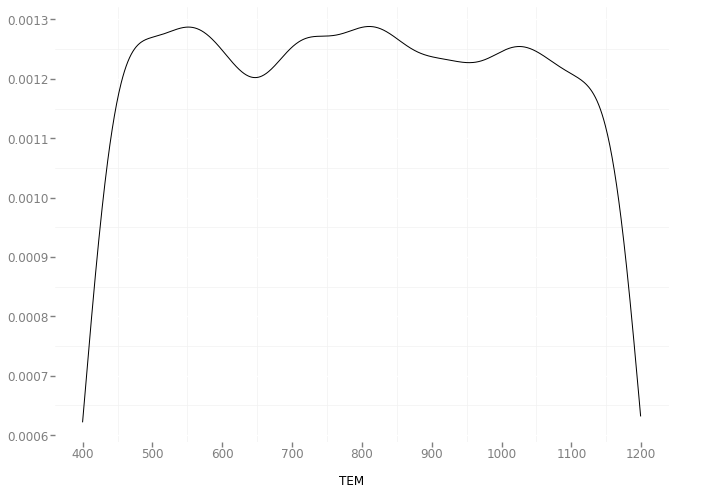

<ggplot: (282156601)>


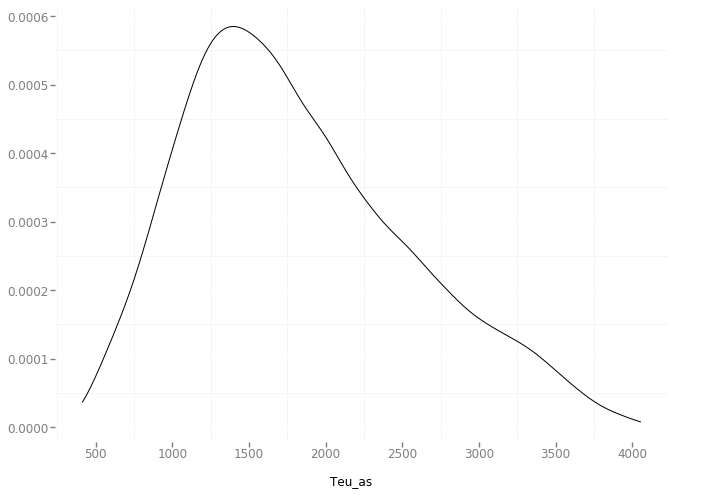

<ggplot: (285985005)>


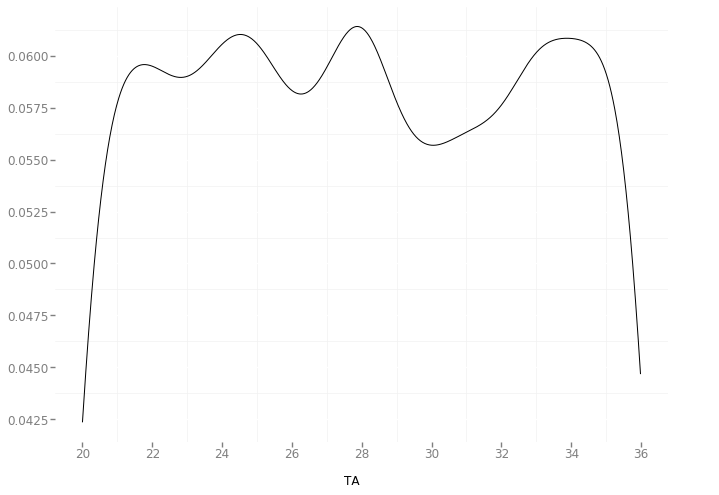

<ggplot: (284002045)>


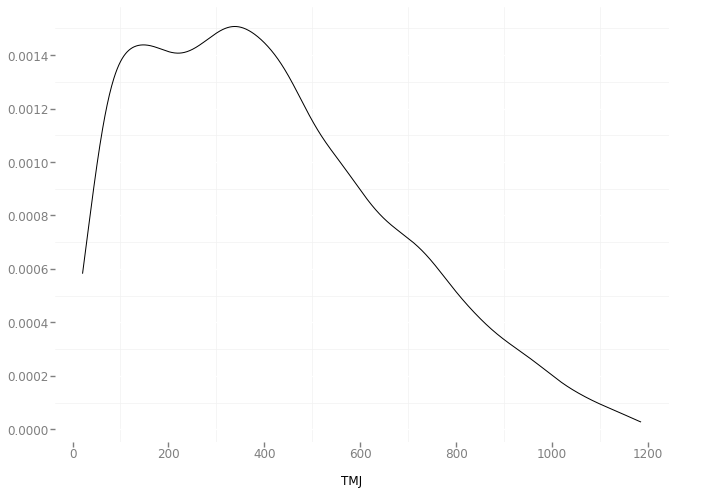

<ggplot: (284123241)>


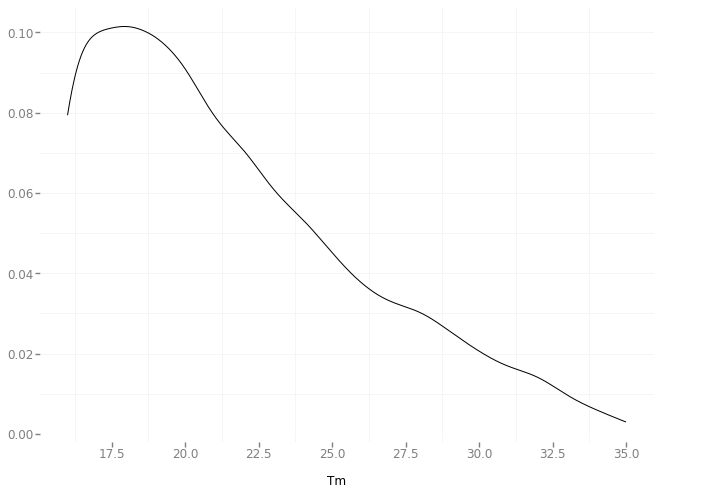

<ggplot: (282787249)>


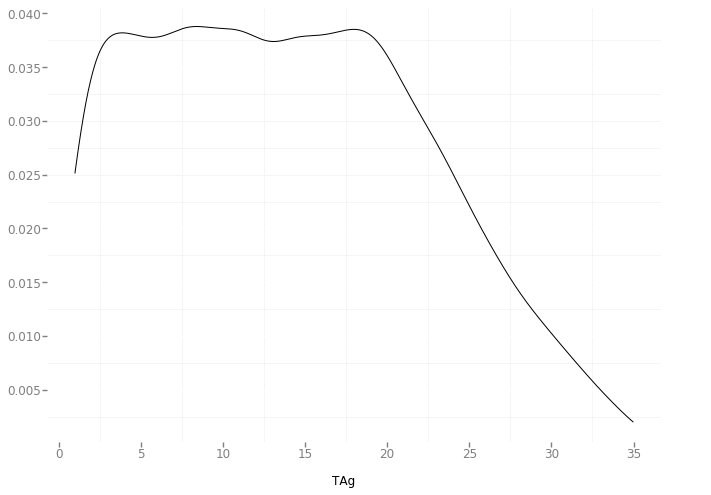

<ggplot: (282764861)>


In [4]:
for param in parameters_df:
    if 'N' in param:
        parameters_df[str(param)+'_log10'] = parameters_df[param].apply(np.log10)
        p = ggplot(aes(x = str(param)+'_log10'), data = parameters_df) + \
            geom_density() + \
            scale_x_log() + \
            theme_bw()
    else:
        p = ggplot(aes(x = param), data = parameters_df) + \
            geom_density() + \
            theme_bw()
    print(p)

### Change time parameters to get uniform distribution 

P(x) = 1/(b-a)  
P(y) = 1/(d-c)  
P(z|x,y)  
 
According to Bayes Theorem,  
P(z|x, y) = P(x, y|z) * P(z)/P(x, y)  
P(x, y) = 1/(b - a) * 1/(d - c)  
P(z) = 1/(d - a)  
P(x, y|z) = P(x < z, y > z) = P(x < z) * P(y > z)  

P(X < z) is the CDF of P(x), so integrate P(x) from a to z.
P(x < z) = (z - a)/(b - a)  
P(y > z) = (d - z)/(d - c)  

so,
P(x, y|z) = (z - a)/(b - a) * (d - z)/(d - c)  
Therefore, 
P(z|x, y) = (z - a)/(b - a) * (d - z)/(d - c) * 1/(d - a) * 1/(b - a) * 1/(d - c)  
= (z - a) * (d - z)/((b - a)^2 * (d - c)^2 * (d-a))

To change to uniform,
we have three factors,
P(X, Y| z), P(z), and P(X, Y), from Baye's rule.  
Note, if dP(z)/dz = 0 for all z, then P(z) is uniform.  
P(z) is fixed to 1/(d -a) by the nature of the problem.  
and P(X, Y|z) is related to the CDF of P(X) and P(Y).  
so you need to choose a P(X) and P(Y),
such that the CDF will cancel all the z depedance.  
Call, P(X) = P(x, a, b), and P(Y) = P(y, c, d).  
So you want to solve
d/dz P(X < z) * P(Y > z)/(P(X) * P(Y)) = 0  
= d/dz P(X < z) * P(Y > z) = 0   
= d/dz CDF(z, a, b) * (1 - CDF(z, c, d)) = 0  
= d/dz (CDF(z, a, b) - CDF(z, a, b) * CDF(z, c, d)) = 0.  
and we know that P(-infinity) = 0,  
so we can just say d/dz of CDF(z, a, b) = P(z, a, b).  
We also have the other term, d/dz of CDF(z, a, b) * CDF(z, c, d) = CDF(z, a, b) * P(z, c, d) + P(z, a, b) * CDF(z, c, d).  
so now if we substitute that back in we have,  
P(z, a, b) + CDF(z, a, b) * P(z, c, d) + CDF(z, c, d) * P(z, a, b) = 0  
= P(z, a, b) * (1 + CDF(z, a, b) * P(z, c, d) + CDF(z, c, d)) = 0  
By the zero product rule, this equation is only solved when either one of the products is zero.  
so either P(z, a, b) = 0 or 1 + CDF(z, a, b) * P(z, c, d) + CDF(z, c, d) = 0.  
Therefore, P(z, a, b) = 0.  
which means that only the trivial solution will work
In other words,
there is no way to randomly choose bounds such that when you sample from those bounds you get a uniform distribution.


In [15]:
def rand_no_space():
    
    random_sample = float(randint(randint(0, 100), randint(100, 200)))
    return random_sample

def rand_rand_funny(min_range, max_range, *args, **kwargs):
    width = randint(min_range, max_range)
    # print('width: %d' % width)
    space_remaining = max_range - width
    # print('space_remaining: %d' % space_remaining)
    random_offset = randint(0, space_remaining)
    # print('random_offset: %d' % random_offset)
    left_boundary = random_offset
    # print('left_boundary: %d' % left_boundary)
    right_boundary = left_boundary + width
    # print('right_boundary: %d' % right_boundary)
    random_sample = randint(left_boundary, right_boundary)
    # print('random_sample: %d' % random_sample)
    return random_sample

def rand_rand_funny2(_, max_range, *args, **kwargs):
    first_boundary = randint(0, max_range)
    second_boundary = randint(0, max_range)
    left_boundary = min(first_boundary, second_boundary)
    right_boundary = max(first_boundary, second_boundary)
    random_sample = randint(left_boundary, right_boundary)
    return random_sample

In [19]:
parameter_vals_Tnew = []
def T_new(chosen_rand_func):
    '''
    Return a list of variables
    '''

    Tgrowth_Af = float(randint(1, 4100))
    Taf = float(randint(1600, 4100))
    TEM = float(randint(400, 1200))
    Teu_as = float(randint(int(TEM) + 1, int(Taf) - 1))
    TA = float(randint(20, 36))
    TMJ = float(randint(int(TA) + 1, int(TEM) - 1))
    Tm = float(randint(16, int(TA) - 1))
    TAg = float(randint(1, int(TA) - 1))
    test = float(chosen_rand_func(0, 200, 'unused_param'))

    parameter_vals_Tnew = [Tgrowth_Af,Taf,TEM,Teu_as,TA,TMJ,Tm,TAg,test]
    return parameter_vals_Tnew

In [20]:
## parameters is a list

# Use the second function
# applied_function = functools.partial(T_new, rand_rand_funny2)

applied_function = functools.partial(T_new, rand_rand_funny)
random_numbers_Tnew = (applied_function() for _ in range(10000))
parameters_names_Tnew = ['Tgrowth_Af','Taf','TEM','Teu_as','TA','TMJ','Tm','TAg','test']
parameter_table_Tnew = []
for r in random_numbers_Tnew:
    parameter_table_Tnew.append(r)
parameters_df_Tnew = pd.DataFrame(parameter_table_Tnew)
parameters_df_Tnew.columns = parameters_names_Tnew
parameters_df_Tnew.head()

,Tgrowth_Af,Taf,TEM,Teu_as,TA,TMJ,Tm,TAg,test
0,3657.0,3941.0,533.0,3016.0,32.0,111.0,29.0,2.0,147.0
1,1908.0,3074.0,645.0,2133.0,30.0,182.0,18.0,15.0,28.0
2,896.0,1925.0,601.0,1677.0,26.0,218.0,19.0,10.0,167.0
3,2455.0,3937.0,708.0,1255.0,29.0,285.0,22.0,25.0,130.0
4,1783.0,4012.0,524.0,3840.0,28.0,444.0,24.0,14.0,71.0


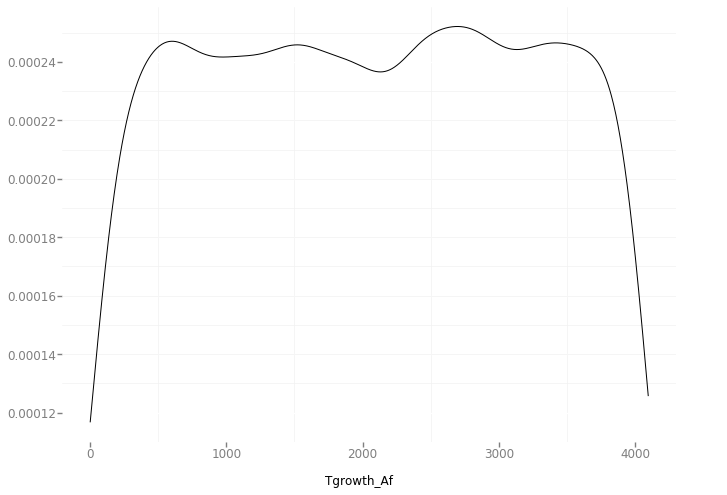

<ggplot: (-9223363259518224170)>


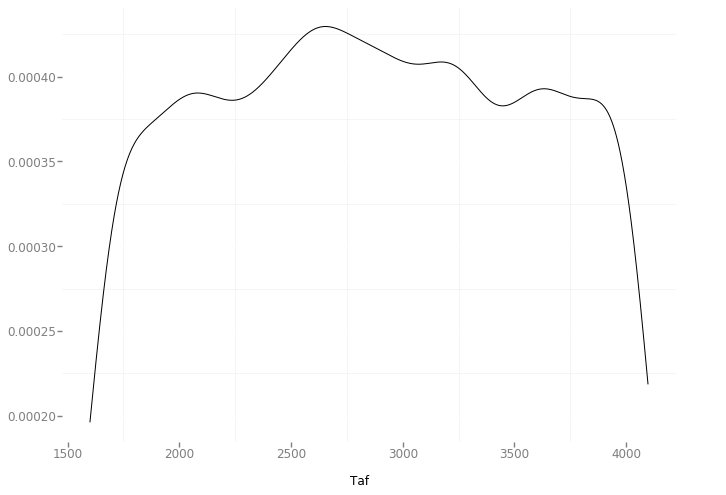

<ggplot: (-9223363259602659545)>


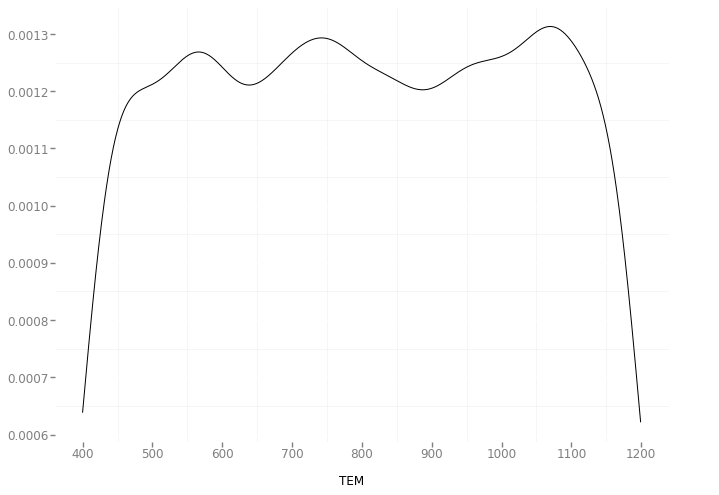

<ggplot: (8777244231316)>


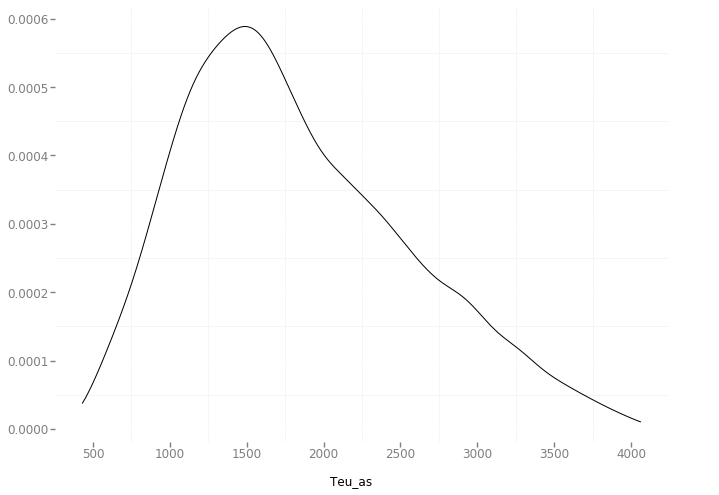

<ggplot: (-9223363259610549195)>


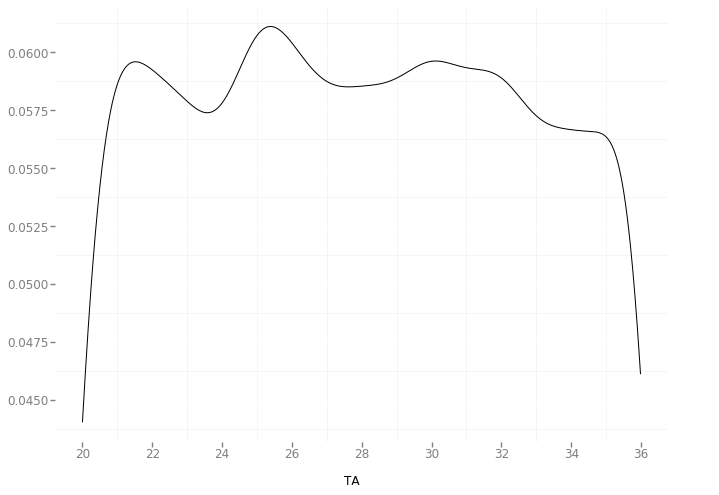

<ggplot: (-9223363259610585691)>


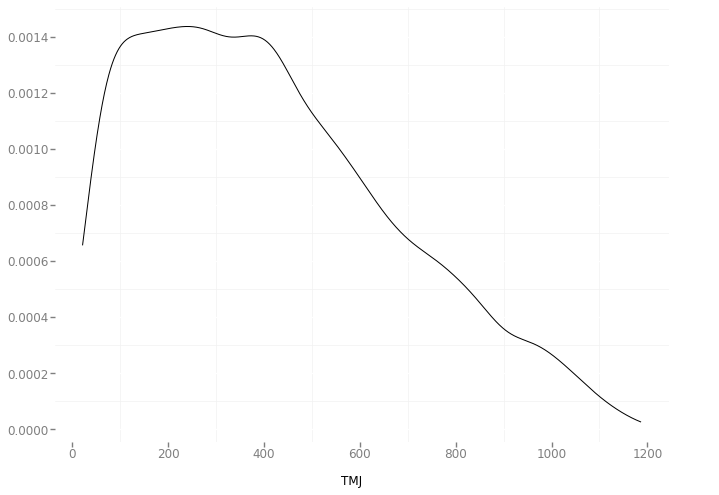

<ggplot: (-9223363259610550766)>


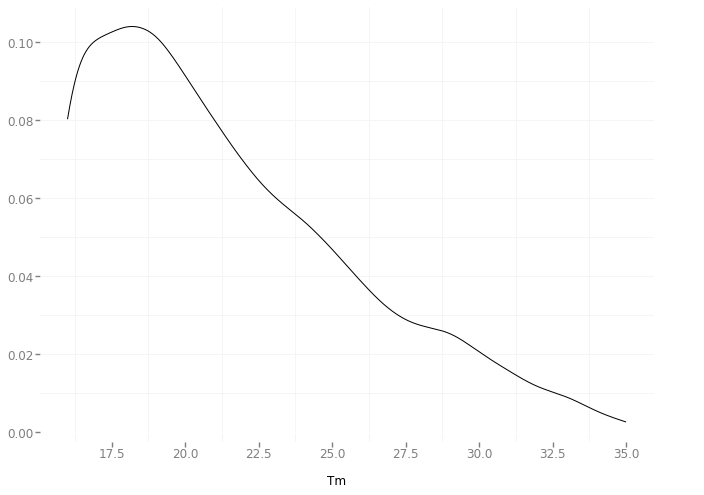

<ggplot: (-9223363259602636158)>


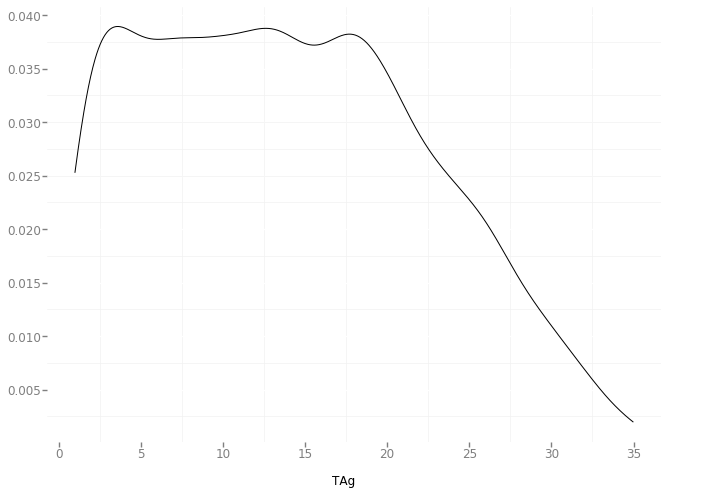

<ggplot: (-9223363259602639079)>


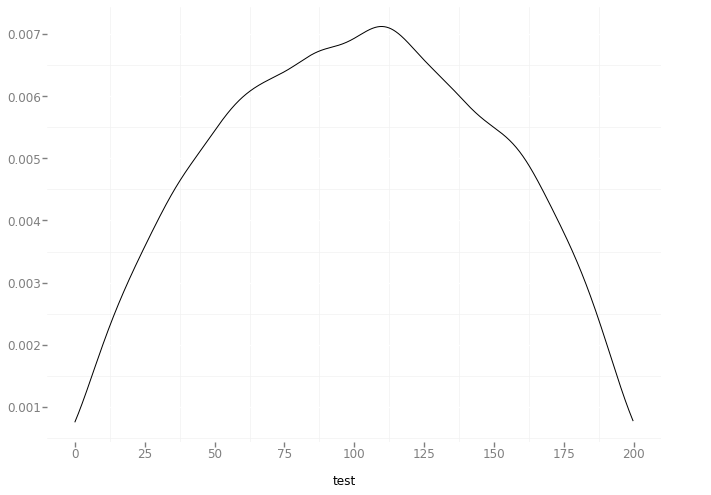

<ggplot: (8777252125497)>


In [21]:
for param in parameters_df_Tnew:
    p = ggplot(aes(x = param), data = parameters_df_Tnew) + \
        geom_density() + \
        theme_bw()
    print(p)

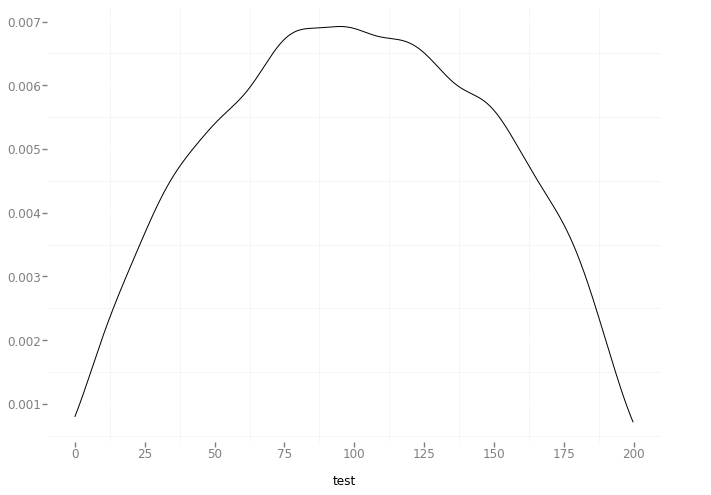

<ggplot: (-9223372036573703694)>


In [9]:
p = ggplot(aes(x = 'test'), data = parameters_df_Tnew) + \
    geom_density() + \
    theme_bw()
print(p)